# Problem Set 4: Harris, SIFT, RANSAC
---
## Setup

In [1]:
# IPython magic
%load_ext autoreload
%autoreload 2
# Matplotlib magic
%matplotlib inline

In [9]:
# Imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
# Matplotlib params
plt.rcParams['figure.figsize'] = (20.0, 8.0)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

---
## 1. Harris corners
### 1.1 Image Gradients

In [19]:
# Gaussian derivative kernel
def gradX(img):
    kernel = np.array([[-3,  0,  3],
                       [-10, 0, 10],
                       [-3,  0,  3]])
    # grad_img = cv2.filter2D(img, -1, kernel)
    grad_img = ndimage.correlate(img, kernel)
    grad_img /= 16 # Normalize
    return grad_img
    
def gradY(img):
    kernel = np.array([[-3, -10, -3],
                       [0,    0,  0],
                       [3,   10,  3]])
    # grad_img = cv2.filter2D(img, -1, kernel)
    grad_img = ndimage.correlate(img, kernel)
    grad_img /= 16 # Normalize
    return grad_img

def plot_grad(img_dx, img_dy):
    # Plot
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    ## Horizontal gradient
    im1 = ax1.imshow(img_dx, vmin=-1, vmax=1)
    ax1.axis('off')
    ## Vertical gradient
    im2 = ax2.imshow(img_dy, vmin=-1, vmax=1)
    ax2.axis('off')
    fig.colorbar(im2, ax=[ax1, ax2], shrink=0.7, aspect=15)
    return

True


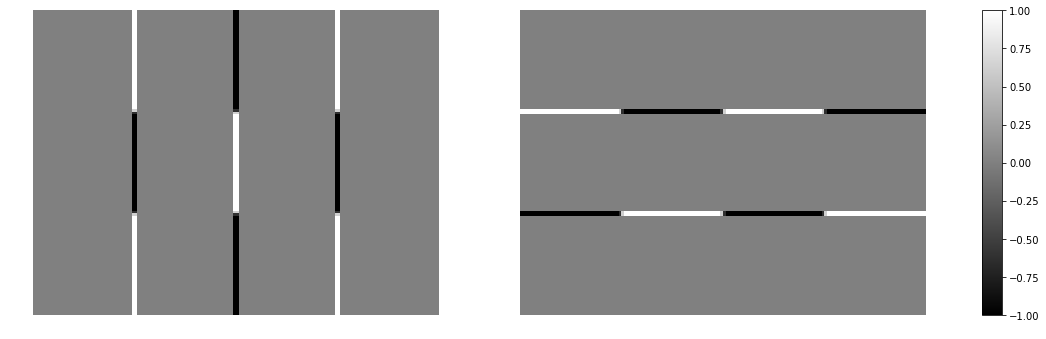

In [20]:
# Load image
check = cv2.imread('check.bmp', 0)
check = check.astype(np.float) / 255
# Calculate Gradients
check_dx = gradX(check)
check_dy = gradY(check)
# Plot
plot_grad(check_dx, check_dy)

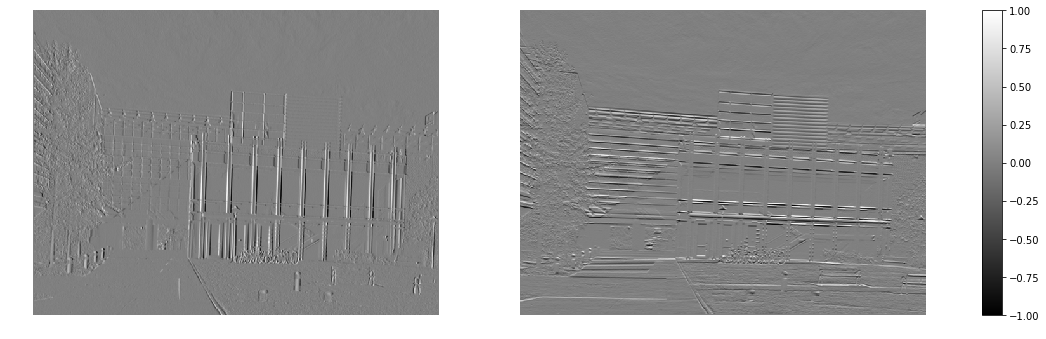

In [7]:
# Load image
transA = cv2.imread('transA.jpg', 0)
transA = transA.astype(np.float) / 255
# Calculate Gradients
transA_dx = gradX(transA)
transA_dy = gradY(transA)
# Plot
plot_grad(transA_dx, transA_dy)

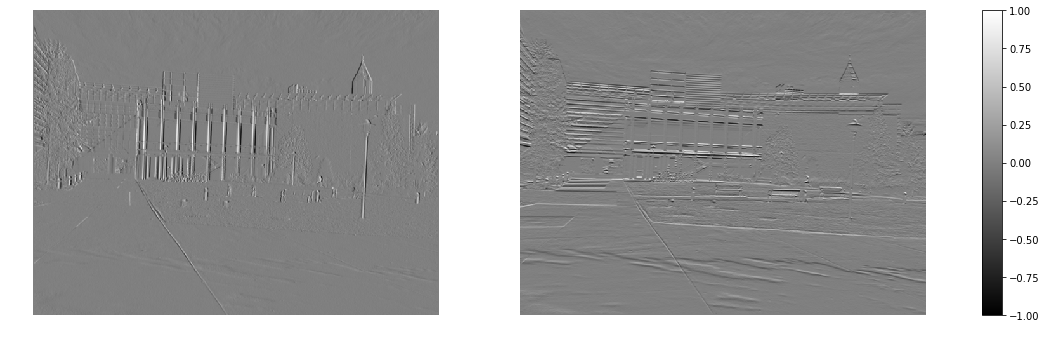

In [8]:
# Load image
simA = cv2.imread('simA.jpg', 0)
simA = simA.astype(np.float) / 255
# Calculate Gradients
simA_dx = gradX(simA)
simA_dy = gradY(simA)
# Plot
plot_grad(simA_dx, simA_dy)

### 1.2 Harris Values

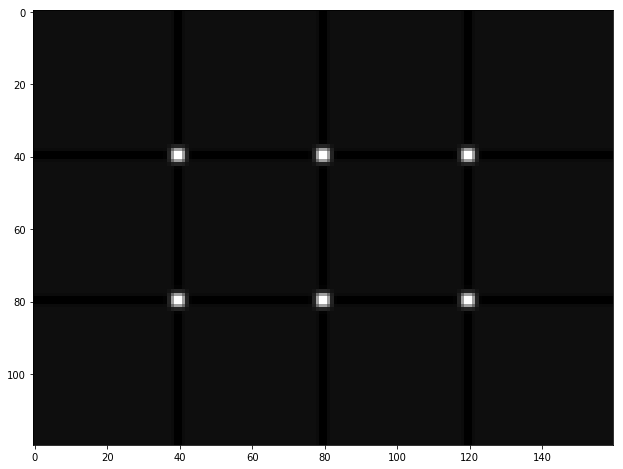

In [30]:
def harris(Ix, Iy, window_size=None, alpha = 0.02):
    '''
    Note: Window Size = 2*int(truncate*sigma + 0.5) + 1
    '''
    Ixx = Ix*Ix
    Ixy = Ix*Iy
    Iyy = Iy*Iy
    M11 = ndimage.gaussian_filter(Ixx, sigma=1)
    M22 = ndimage.gaussian_filter(Iyy, sigma=1)
    M12 = ndimage.gaussian_filter(Ixy, sigma=1)
    detM = M11*M22 - M12*M12
    trM = M11 + M22
    R = detM - alpha*(trM**2)
    return R

plt.imshow(harris(check_dx, check_dy))